In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Read data

In [3]:
df1 = pd.read_csv('./data/LoanStats_securev1_2017Q1.csv', skiprows=[0])
df2 = pd.read_csv('./data/LoanStats_securev1_2017Q2.csv', skiprows=[0])
df3 = pd.read_csv('./data/LoanStats_securev1_2017Q3.csv', skiprows=[0])
df4 = pd.read_csv('./data/LoanStats3c_securev1_2014.csv', skiprows=[0])
df5 = pd.read_csv('./data/LoanStats3d_securev1_2015.csv', skiprows=[0])

### Check if all the datasets have same column

In [4]:
columns = np.dstack((list(df1.columns), list(df2.columns), list(df3.columns), list(df4.columns), list(df5.columns))) 

In [5]:
coldf = pd.DataFrame(columns[0])

In [17]:
coldf

,0,1,2,3,4
0,id,id,id,id,id
1,member_id,member_id,member_id,member_id,member_id
2,loan_amnt,loan_amnt,loan_amnt,loan_amnt,loan_amnt
3,funded_amnt,funded_amnt,funded_amnt,funded_amnt,funded_amnt
4,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv
5,term,term,term,term,term
6,int_rate,int_rate,int_rate,int_rate,int_rate
7,installment,installment,installment,installment,installment
8,grade,grade,grade,grade,grade
9,sub_grade,sub_grade,sub_grade,sub_grade,sub_grade


In [18]:
df = pd.concat([df1, df2, df3, df4, df5])

### Get familiar with data

In [19]:
df.shape

(981665, 151)

In [20]:
print(list(df.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [21]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,Project Leader,10+ years,MORTGAGE,82000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,672xx,KS,31.07,0.0,May-1996,725.0,729.0,0.0,NaN,NaN,18.0,0.0,69578.0,63.2%,31.0,w,11438.26,11438.26,3912.17,3912.17,2561.74,1350.43,0.0,0.0,0.0,Dec-2017,492.13,Jan-2018,Dec-2017,714.0,710.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,202617.0,0.0,3.0,0.0,1.0,22.0,34430.0,57.0,0.0,2.0,13686.0,61.0,110037.0,0.0,9.0,0.0,3.0,11257.0,29762.0,63.4,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,NaN,13.0,NaN,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,286204.0,104008.0,81400.0,60167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,MORTGAGE,215000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,067xx,CT,6.06,0.0,Jan-2004,765.0,769.0,4.0,NaN,NaN,11.0,0.0,8678.0,18.8%,16.0,f,4190.59,4190.59,1586.64,1586.64,809.41,777.23,0.0,0.0,0.0,Dec-2017,200.10,Jan-2018,Dec-2017,779.0,775.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,44754.0,1.0,3.0,2.0,4.0,7.0,35832.0,68.0,2.0,2.0,8659.0,27.0,46200.0,2.0,0.0,6.0,6.0,4069.0,37522.0,18.8,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,100763.0,447

In [22]:
df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,float64,111
1,object,40


### Select data with loan_status either Fully Paid or Charged Off 

In [23]:
df.loan_status.value_counts()

Current               500937
Fully Paid            358629
Charged Off            99099
Late (31-120 days)     13203
In Grace Period         6337
Late (16-30 days)       3414
Default                   36
Name: loan_status, dtype: int64

In [24]:
df = df.loc[(df['loan_status'].isin(['Fully Paid', 'Charged Off']))]

In [25]:
df.shape

(457728, 151)

### Feature selections and clean

### Find the missing columns and their types

In [26]:
df_dtypes = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [27]:
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
1,tot_hi_cred_lim,0,float64
2,tot_cur_bal,0,float64
3,tot_coll_amt,0,float64
4,acc_now_delinq,0,float64
5,total_bal_ex_mort,0,float64
6,total_bc_limit,0,float64
7,total_il_high_credit_limit,0,float64
9,policy_code,0,float64
10,collections_12_mths_ex_med,0,float64
11,last_fico_range_low,0,float64


#### 1. Check columns have more than 400000 missing values (~90%)

In [30]:
missing_df = df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()

In [31]:
miss_4000 = list(missing_df[missing_df.missing_value >= 400000]['index'])

In [32]:
print(len(miss_4000))

53


In [33]:
print(sorted(miss_4000))

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_rcnt_il', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'settlement_amount', 'settlement_date', 'se

In [34]:
df.drop(miss_4000, axis = 1, inplace = True)

#### 2. Remove constant features

In [35]:
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [36]:
const_features = find_constant_features(df)

In [37]:
const_features

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']

In [38]:
df.hardship_flag.value_counts()

N    457728
Name: hardship_flag, dtype: int64

In [39]:
df.drop(const_features, axis = 1, inplace = True)

#### 3. Remove Duplicate rows

In [40]:
df.shape

(457728, 93)

In [41]:
df.drop_duplicates(inplace= True)

In [42]:
df.shape

(457728, 93)

#### 4. Remove duplicate columns

In [43]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

In [44]:
duplicate_cols = duplicate_columns(df)

In [45]:
duplicate_cols

['loan_amnt']

#### 5. Remove/process features manually

In [131]:
features_to_be_removed = []

In [47]:

def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

### 0-10 features

In [48]:
df.iloc[0:5, 0: 10]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title
16,104190249,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector
38,104190255,35000.0,35000.0,35000.0,60 months,25.49%,1037.38,E,E4,Human Resource Specialist LER
40,104170260,17000.0,17000.0,17000.0,36 months,7.49%,528.73,A,A4,Air Traffic Controller
51,104046830,10000.0,10000.0,10000.0,36 months,11.49%,329.72,B,B5,General manager
56,104220223,5000.0,5000.0,5000.0,36 months,14.99%,173.31,C,C4,Lead Supervisor


In [49]:
len(df.loan_amnt.value_counts())

1415

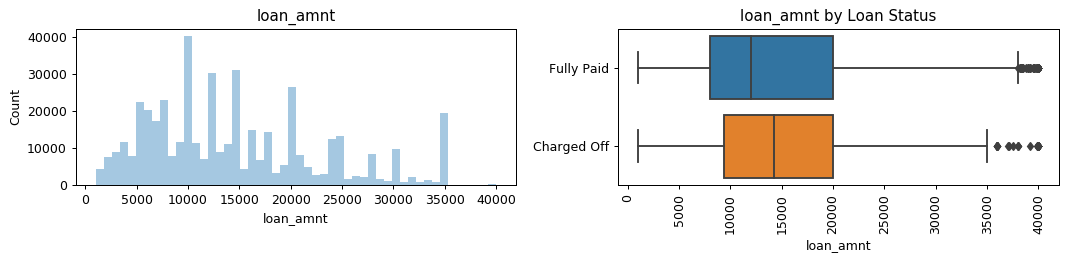

In [50]:
plot_feature('loan_amnt', True)

It looks like all loans are not unique. Certain amount appear several times. It may be the reason, company has some range or certain amount to lend

##### Term feature

In [51]:
df.term = df.term.str.replace('months', '').astype(np.int)

In [52]:
df.term.value_counts()

36    341042
60    116686
Name: term, dtype: int64

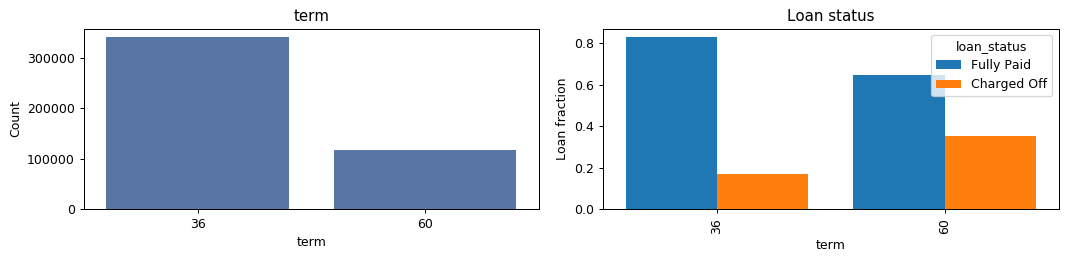

In [53]:
plot_feature('term', False)

##### interest rate

In [54]:
df.int_rate = df.int_rate.str.replace('%', '').astype(np.float32)

In [55]:
len(df.int_rate.value_counts())

200

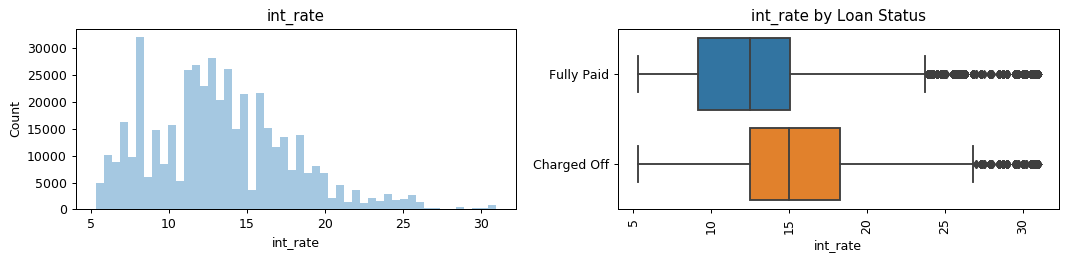

In [56]:
plot_feature('int_rate', True)

It looks like interest rates are for those who could not pay their debt.

##### grade and subgrade

In [57]:
df.grade.value_counts()

C    129972
B    123078
A     75560
D     74329
E     38835
F     12509
G      3445
Name: grade, dtype: int64

In [58]:
df.sub_grade.value_counts()

C1    27783
C2    27383
B5    26522
C3    26375
B4    26218
C4    25615
B3    25569
B2    22889
C5    22816
A5    22738
B1    21880
D1    19249
A4    17546
D2    16052
D3    14561
D4    13405
A3    11973
A2    11711
A1    11592
D5    11062
E1    10364
E2     9177
E3     7538
E4     6260
E5     5496
F1     3990
F2     2804
F3     2449
F4     1883
F5     1383
G1     1121
G2      864
G3      603
G4      461
G5      396
Name: sub_grade, dtype: int64

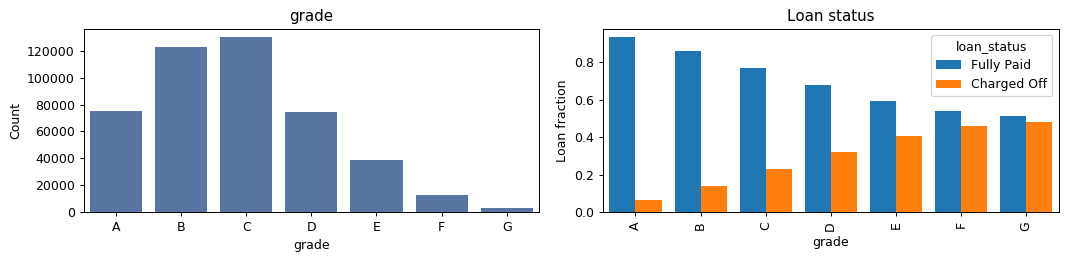

In [59]:
plot_feature('grade', False)

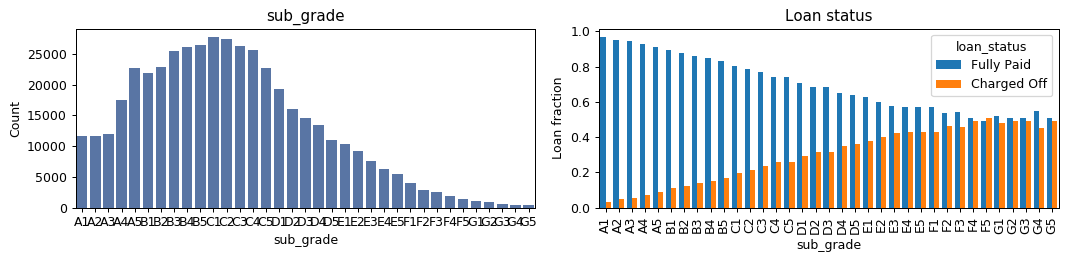

In [60]:
plot_feature('sub_grade', False)

It seems that grade and sub grade have same shape and relation with loan status. IN this case I would keep sub_grade, because it carries more information than the grade.

##### emp_title

In [61]:
len(df.emp_title.value_counts())

128310

It looks like emp_title has lots of unique value, which may not be strongly associated with predicted loan amount

In [132]:
features_to_be_removed.extend(['emp_title', 'id'])

#### 11-20 features

In [63]:
df.iloc[0:5, 6: 20]

,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code
16,111.97,A,A4,Code/Compliance Inspector,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,Other,467xx
38,1037.38,E,E4,Human Resource Specialist LER,10+ years,MORTGAGE,114000.0,Source Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,224xx
40,528.73,A,A4,Air Traffic Controller,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,840xx
51,329.72,B,B5,General manager,10+ years,OWN,145000.0,Not Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,087xx
56,173.31,C,C4,Lead Supervisor,10+ years,RENT,68000.0,Not Verified,Mar-2017,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,945xx


##### emp_length

In [64]:
df.emp_length.value_counts()

10+ years    151369
2 years       41008
< 1 year      36781
3 years       36372
1 year        29681
4 years       26812
5 years       26720
8 years       22753
7 years       22333
6 years       20774
9 years       18240
Name: emp_length, dtype: int64

In [65]:
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

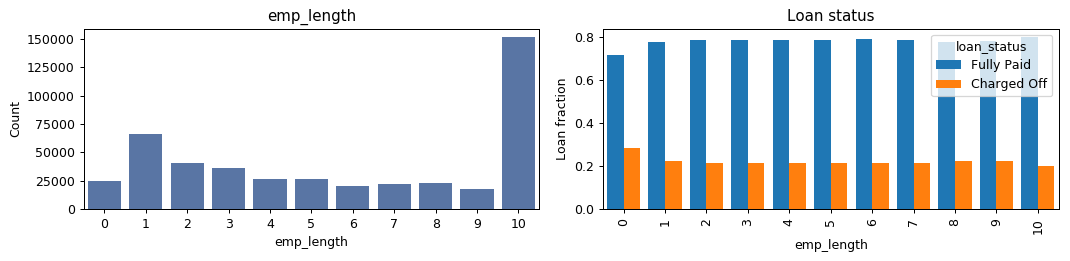

In [66]:
plot_feature('emp_length', False)

It looks like emp lenght is not good predictor to determine the loan status. Sicne number of loanees remain same with the employment length.

##### home_ownership

In [67]:
df.home_ownership.value_counts()

MORTGAGE    228469
RENT        181308
OWN          47875
ANY             75
NONE             1
Name: home_ownership, dtype: int64

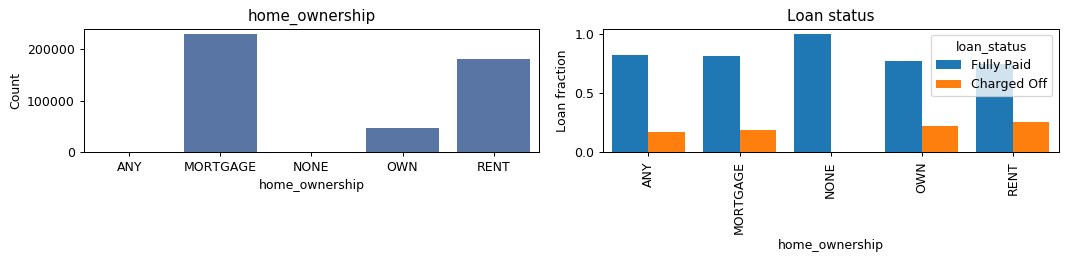

In [68]:
plot_feature('home_ownership', False)

home_ownership is also not that much discreminatory

##### verification_status

In [69]:
df.verification_status.value_counts()

Source Verified    187996
Not Verified       135931
Verified           133801
Name: verification_status, dtype: int64

In [70]:
df.verification_status = df.verification_status.map(lambda x: 1 if x == 'Not Verified' else 0)

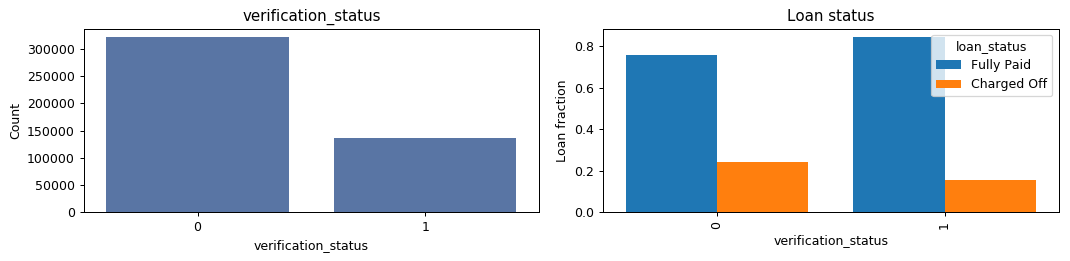

In [71]:
plot_feature('verification_status', False)

verification_status is somewhat discreminative in the sense that, among the loanes whose source was verified are more charged off which is a bit wired.

#### issue_d

In [211]:
df.issue_d.value_counts()

Oct-2014    33699
Jul-2014    25974
Jul-2015    23990
Jan-2015    22750
Oct-2015    22431
Nov-2014    21186
Apr-2015    20097
Dec-2015    19106
May-2015    17964
Aug-2015    17492
Apr-2014    17140
May-2014    17133
Aug-2014    16780
Nov-2015    16540
Jun-2015    15304
Jun-2014    15207
Mar-2015    14997
Mar-2014    14988
Jan-2014    14464
Feb-2015    14464
Feb-2014    13945
Sep-2015    13838
Sep-2014     9344
Dec-2014     8283
Jan-2017     5912
Mar-2017     5008
Feb-2017     4241
May-2017     3644
Apr-2017     3431
Jun-2017     2849
Jul-2017     2366
Aug-2017     1863
Sep-2017     1298
Name: issue_d, dtype: int64

In [76]:
df['issue_month'] = pd.Series(df.issue_d).str.replace(r'-\d+', '')

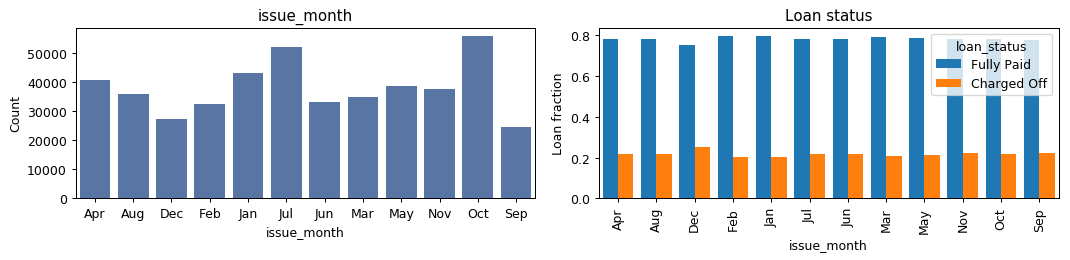

In [77]:
plot_feature('issue_month', False)

It looks like people who borrowed in December, are more charged off than those who borrowed in other months.

In [78]:
df.issue_month = df.issue_month.astype("category", categories=np.unique(df.issue_month)).cat.codes

In [79]:
df.issue_month.value_counts()

10    56130
5     52330
4     43126
0     40668
8     38741
9     37726
1     36135
7     34993
6     33360
3     32650
2     27389
11    24480
Name: issue_month, dtype: int64

In [80]:
df['issue_year'] = pd.Series(df.issue_d).str.replace(r'\w+-', '').astype(np.int) 

In [81]:
df.issue_year.value_counts()

2015    218973
2014    208143
2017     30612
Name: issue_year, dtype: int64

#### loan status

In [82]:
df.loan_status.value_counts()

Fully Paid     358629
Charged Off     99099
Name: loan_status, dtype: int64

In [83]:
df.loan_status = df.loan_status.map(lambda x: 1 if x == 'Charged Off' else 0)

#### url

In [84]:
features_to_be_removed.append('url')

#### purpose

In [85]:
df.purpose.value_counts()

debt_consolidation    276597
credit_card           102367
home_improvement       27628
other                  22100
major_purchase          8256
medical                 4786
small_business          4206
car                     3963
moving                  2954
vacation                2755
house                   1836
renewable_energy         268
wedding                   11
educational                1
Name: purpose, dtype: int64

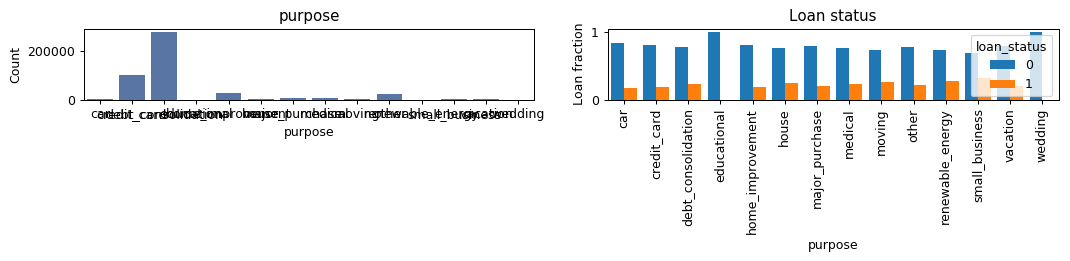

In [86]:
plot_feature('purpose', False)

It looks like, purpose can be a good discrimnatory. For exmaple people who had a purpose for renewable energy are more charged off while people borrwed loan for car or educational purpose are less charged off.

#### title

In [87]:
len(df.title.value_counts())

1935

In [134]:
features_to_be_removed.append('title')

#### zip_code

In [89]:
len(df.zip_code.value_counts())

910

In [135]:
features_to_be_removed.append('zip_code')

##### addr_state

In [91]:
df.addr_state.value_counts()

CA    67209
TX    37406
NY    36650
FL    31741
IL    17478
NJ    16260
PA    15857
OH    14976
GA    14691
VA    13204
NC    12875
MI    12183
AZ    11150
MD    10692
CO    10559
MA    10188
WA    10153
MN     8392
IN     7955
TN     7405
MO     7170
NV     6881
CT     6246
WI     6011
AL     5818
OR     5805
SC     5358
LA     5336
KY     4423
OK     4122
KS     3778
UT     3603
AR     3408
NM     2671
MS     2384
HI     2333
NH     2141
RI     1983
WV     1974
MT     1319
DE     1292
DC     1204
AK     1125
WY     1038
SD      943
VT      941
NE      732
ME      291
ND      280
ID       93
IA        1
Name: addr_state, dtype: int64

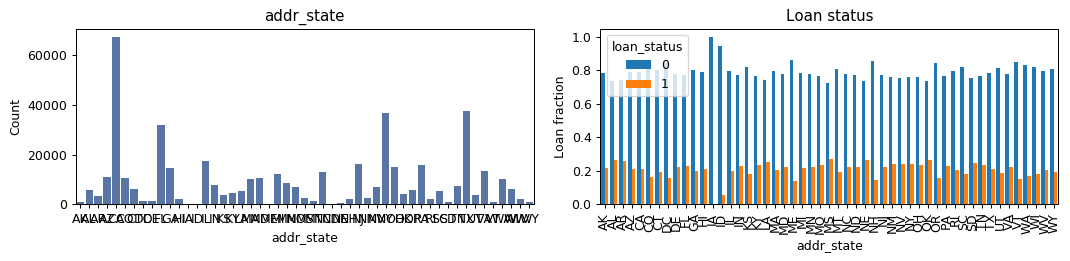

In [92]:
plot_feature('addr_state', False)

addr_state can be a good discreminatory feature.

##### dti

In [93]:
# plot_feature('dti', True)

### 21 - 30 features

In [94]:
df.iloc[0:5, 15: 30]

,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc
16,0,https://lendingclub.com/browse/loanDetail.acti...,other,Other,467xx,IN,18.90,0.0,Aug-1992,720.0,724.0,1.0,NaN,96.0,18.0
38,0,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,224xx,VA,14.04,0.0,Nov-1998,660.0,664.0,1.0,30.0,NaN,17.0
40,0,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,840xx,UT,8.41,0.0,Oct-2005,735.0,739.0,0.0,72.0,89.0,9.0
51,0,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,087xx,NJ,13.31,2.0,Sep-2005,705.0,709.0,0.0,8.0,NaN,13.0
56,0,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,945xx,CA,22.50,0.0,Apr-2003,660.0,664.0,0.0,27.0,NaN,6.0


##### earliest_cr_line

In [97]:
df['earliest_cr_year'] = df.earliest_cr_line.str.replace(r'\w+-', '').astype(np.int)

In [98]:
df['credit_history'] = np.absolute(df['issue_year']- df['earliest_cr_year'])

In [99]:
df.credit_history.value_counts()

13    32959
14    32690
12    31406
15    29670
11    28940
16    26000
10    23389
17    21970
18    19927
19    19155
20    17403
9     17389
21    15139
8     15041
22    11740
7     11408
23     9530
24     9333
25     8890
26     7844
6      7647
27     6844
28     6125
5      5866
4      5559
29     5200
30     4842
31     4073
32     3320
33     2380
3      2078
34     1957
35     1799
36     1684
37     1535
38     1302
39      988
40      785
41      682
42      632
43      497
44      389
45      363
47      278
46      272
48      204
49      158
50      130
51       85
52       60
53       41
54       32
56       27
55       26
59       10
57        9
58        8
60        6
64        4
61        2
65        2
66        1
63        1
62        1
70        1
Name: credit_history, dtype: int64

In [137]:
features_to_be_removed.extend(['issue_d', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record'])

### 31 - 40 features

In [101]:
df.iloc[0:5, 25: 40]

,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
16,724.0,1.0,NaN,96.0,18.0,1.0,5658.0,14.9%,33.0,w,3765.098751,3765.10,3600.0,165.10,0.0
38,664.0,1.0,30.0,NaN,17.0,0.0,35694.0,74.8%,31.0,w,36875.078917,36875.08,35000.0,1875.08,0.0
40,739.0,0.0,72.0,89.0,9.0,1.0,15406.0,31.6%,34.0,w,17282.802792,17282.80,17000.0,282.80,0.0
51,709.0,0.0,8.0,NaN,13.0,0.0,7936.0,31.9%,30.0,w,10365.368358,10365.37,10000.0,365.37,0.0
56,664.0,0.0,27.0,NaN,6.0,0.0,10276.0,90.1%,18.0,f,5168.906377,5168.91,5000.0,168.91,0.0


In [102]:
df.revol_util = df.revol_util.str.replace('%', '').astype(np.float32)

In [103]:
df.initial_list_status.value_counts()

w    259204
f    198524
Name: initial_list_status, dtype: int64

In [104]:
df.initial_list_status = df.initial_list_status.map(lambda x: 1 if x== 'w' else 0)

In [138]:
features_to_be_removed.extend(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'])

### 41 - 50 features

In [106]:
df.iloc[0:5, 35: 50]

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type
16,3765.098751,3765.10,3600.0,165.10,0.0,0.0,0.0,Dec-2017,2984.31,Dec-2017,724.0,720.0,0.0,NaN,Individual
38,36875.078917,36875.08,35000.0,1875.08,0.0,0.0,0.0,Jun-2017,35565.10,Jun-2017,709.0,705.0,0.0,30.0,Individual
40,17282.802792,17282.80,17000.0,282.80,0.0,0.0,0.0,Jun-2017,16768.22,Dec-2017,764.0,760.0,0.0,75.0,Individual
51,10365.368358,10365.37,10000.0,365.37,0.0,0.0,0.0,Aug-2017,9388.98,Nov-2017,734.0,730.0,0.0,26.0,Individual
56,5168.906377,5168.91,5000.0,168.91,0.0,0.0,0.0,Jun-2017,5003.93,Dec-2017,659.0,655.0,0.0,NaN,Individual


In [107]:
df.application_type.value_counts()

Individual    456197
Joint App       1531
Name: application_type, dtype: int64

In [108]:
df.application_type = df.application_type.map(lambda x: 0 if x == 'Individual' else 1)

In [139]:
features_to_be_removed.extend(['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog'])

### 51 - 60 features

In [111]:
df.iloc[0:5, 45: 60]

,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt
16,724.0,720.0,0.0,NaN,0,0.0,0.0,36506.0,37900.0,13.0,2147.0,7980.0,11.3,0.0,0.0
38,709.0,705.0,0.0,30.0,0,0.0,0.0,394086.0,47700.0,2.0,24630.0,1481.0,95.5,0.0,0.0
40,764.0,760.0,0.0,75.0,0,0.0,0.0,290743.0,48800.0,3.0,32305.0,32394.0,32.2,0.0,0.0
51,734.0,730.0,0.0,26.0,0,0.0,0.0,324984.0,24900.0,8.0,24999.0,11199.0,40.1,0.0,0.0
56,659.0,655.0,0.0,NaN,0,0.0,531.0,36168.0,11400.0,2.0,6028.0,1124.0,90.1,0.0,0.0


In [140]:
features_to_be_removed.extend([ 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt'])

### 61 - 70 features

In [113]:
df.iloc[0:5, 55: 70]

,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd
16,2147.0,7980.0,11.3,0.0,0.0,166.0,295.0,3.0,2.0,0.0,9.0,NaN,2.0,NaN,0.0
38,24630.0,1481.0,95.5,0.0,0.0,157.0,220.0,0.0,0.0,4.0,26.0,NaN,0.0,NaN,4.0
40,32305.0,32394.0,32.2,0.0,0.0,137.0,119.0,24.0,9.0,2.0,24.0,NaN,9.0,NaN,0.0
51,24999.0,11199.0,40.1,0.0,0.0,133.0,138.0,4.0,4.0,1.0,4.0,64.0,2.0,29.0,0.0
56,6028.0,1124.0,90.1,0.0,0.0,167.0,111.0,46.0,18.0,0.0,46.0,NaN,18.0,NaN,0.0


In [141]:
features_to_be_removed.extend(['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd'])

#### 71 - 80 features

In [115]:
df.iloc[0:5, 65: 80]

,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m
16,9.0,NaN,2.0,NaN,0.0,1.0,4.0,2.0,3.0,17.0,12.0,16.0,4.0,18.0,0.0
38,26.0,NaN,0.0,NaN,4.0,9.0,11.0,10.0,11.0,8.0,14.0,16.0,11.0,17.0,0.0
40,24.0,NaN,9.0,NaN,0.0,4.0,4.0,5.0,6.0,24.0,6.0,8.0,4.0,9.0,0.0
51,4.0,64.0,2.0,29.0,0.0,6.0,8.0,6.0,8.0,10.0,9.0,19.0,8.0,13.0,0.0
56,46.0,NaN,18.0,NaN,0.0,4.0,4.0,4.0,6.0,8.0,4.0,9.0,4.0,6.0,0.0


In [142]:
features_to_be_removed.extend(['num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m'])

#### 81 - 100 features

In [117]:
df.iloc[0:5, 75: 90]

,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit
16,12.0,16.0,4.0,18.0,0.0,0.0,0.0,6.0,100.0,0.0,1.0,0.0,93599.0,36506.0,9000.0
38,14.0,16.0,11.0,17.0,0.0,0.0,0.0,1.0,87.1,100.0,0.0,0.0,424707.0,81780.0,32700.0
40,6.0,8.0,4.0,9.0,0.0,0.0,0.0,1.0,94.1,20.0,1.0,0.0,374071.0,48682.0,47800.0
51,9.0,19.0,8.0,13.0,0.0,0.0,0.0,3.0,66.7,16.7,0.0,0.0,411827.0,68390.0,18700.0
56,4.0,9.0,4.0,6.0,0.0,0.0,0.0,0.0,94.4,75.0,0.0,0.0,52113.0,36168.0,11400.0


In [143]:
features_to_be_removed.extend(['num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit'])

### 91 to rest of the features

In [119]:
df.iloc[0:5, 85:]

,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,issue_month,issue_year,earliest_cr_year,credit_history
16,1.0,0.0,93599.0,36506.0,9000.0,55699.0,Cash,N,7,2017,1992,25
38,0.0,0.0,424707.0,81780.0,32700.0,52309.0,Cash,N,7,2017,1998,19
40,1.0,0.0,374071.0,48682.0,47800.0,38667.0,Cash,N,7,2017,2005,12
51,0.0,0.0,411827.0,68390.0,18700.0,82927.0,Cash,N,7,2017,2005,12
56,0.0,0.0,52113.0,36168.0,11400.0,40713.0,Cash,N,7,2017,2003,14


In [120]:
df.disbursement_method.value_counts()

Cash         457716
DirectPay        12
Name: disbursement_method, dtype: int64

In [121]:
df.disbursement_method = df.disbursement_method.map(lambda x: 0 if x == 'Cash' else 1)

In [122]:
df.debt_settlement_flag.value_counts()

N    449510
Y      8218
Name: debt_settlement_flag, dtype: int64

In [123]:
df.debt_settlement_flag = df.debt_settlement_flag.map(lambda x: 0 if x == 'N' else 1)

In [144]:
features_to_be_removed.extend(['debt_settlement_flag', 'total_il_high_credit_limit'])

### Removed _ features

In [145]:
print(features_to_be_removed)

['emp_title', 'id', 'title', 'title', 'zip_code', 'issue_d', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'issue_d', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_

In [147]:
len(set(features_to_be_removed))

60

### Drop selected features

In [148]:
df_selected = df.drop(list(set(features_to_be_removed)), axis = 1)

In [149]:
df_selected.shape

(457728, 37)

In [150]:
df_dtypes = pd.merge(df_selected.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df_selected.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [151]:
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
13,issue_month,0,int8
6,initial_list_status,0,int64
8,application_type,0,int64
12,disbursement_method,0,int64
14,issue_year,0,int64
16,earliest_cr_year,0,int64
18,emp_length,0,int64
21,term,0,int64
27,credit_history,0,int64
29,verification_status,0,int64


In [152]:
df_selected.dropna(inplace=True)

In [153]:
df_selected.shape

(457484, 37)

In [164]:
df_selected.drop('earliest_cr_line', axis = True, inplace=True)

In [165]:
df_selected.drop('url', axis = True, inplace=True)

In [166]:
df_selected.purpose.value_counts()

debt_consolidation    276479
credit_card           102340
home_improvement       27591
other                  22073
major_purchase          8246
medical                 4776
small_business          4204
car                     3959
moving                  2950
vacation                2751
house                   1835
renewable_energy         268
wedding                   11
educational                1
Name: purpose, dtype: int64

In [167]:
df_selected.purpose = df_selected.purpose.astype("category", categories=np.unique(df_selected.purpose)).cat.codes

In [168]:
df_selected.purpose.value_counts()

2     276479
1     102340
4      27591
9      22073
6       8246
7       4776
11      4204
0       3959
8       2950
12      2751
5       1835
10       268
13        11
3          1
Name: purpose, dtype: int64

In [170]:
df_selected.home_ownership = df_selected.home_ownership.astype("category", categories = np.unique(df_selected.home_ownership)).cat.codes

In [171]:
df_selected.home_ownership.value_counts()

1    228337
4    181232
3     47839
0        75
2         1
Name: home_ownership, dtype: int64

In [172]:
df_selected.grade = df_selected.grade.astype("category", categories = np.unique(df_selected.grade)).cat.codes

In [173]:
df_selected.grade.value_counts()

2    129897
1    123032
0     75537
3     74262
4     38812
5     12501
6      3443
Name: grade, dtype: int64

In [175]:
df_selected.sub_grade = df_selected.sub_grade.astype("category", categories = np.unique(df_selected.sub_grade)).cat.codes

In [176]:
df_selected.sub_grade.value_counts()

10    27774
11    27365
9     26514
12    26361
8     26205
13    25596
7     25556
6     22881
14    22801
4     22731
5     21876
15    19234
3     17541
16    16039
17    14551
18    13390
2     11969
1     11707
0     11589
19    11048
20    10361
21     9170
22     7532
23     6255
24     5494
25     3989
26     2802
27     2447
28     1882
29     1381
30     1121
31      863
32      603
33      461
34      395
Name: sub_grade, dtype: int64

In [178]:
df_selected.addr_state = df_selected.addr_state.astype("category", categories = np.unique(df_selected.addr_state)).cat.codes

In [179]:
df_selected.sub_grade.value_counts()

10    27774
11    27365
9     26514
12    26361
8     26205
13    25596
7     25556
6     22881
14    22801
4     22731
5     21876
15    19234
3     17541
16    16039
17    14551
18    13390
2     11969
1     11707
0     11589
19    11048
20    10361
21     9170
22     7532
23     6255
24     5494
25     3989
26     2802
27     2447
28     1882
29     1381
30     1121
31      863
32      603
33      461
34      395
Name: sub_grade, dtype: int64

In [182]:
df_selected.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'acc_open_past_24mths',
       'mort_acc', 'pub_rec_bankruptcies', 'tax_liens', 'disbursement_method',
       'issue_month', 'issue_year', 'earliest_cr_year', 'credit_history'],
      dtype='object')

### Find Feature correlations

In [202]:
corr = df_selected.corr()

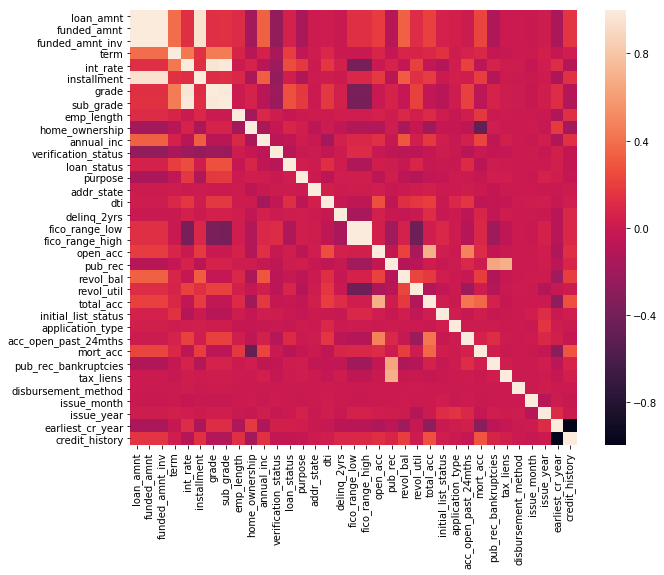

In [221]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr)
plt.show()

In [214]:
corr['loan_status'].sort_values(ascending = False)

loan_status             1.000000
sub_grade               0.275054
grade                   0.269940
int_rate                0.255399
term                    0.193636
dti                     0.123988
acc_open_past_24mths    0.097327
home_ownership          0.078022
revol_util              0.076245
loan_amnt               0.056580
funded_amnt             0.056580
funded_amnt_inv         0.056509
earliest_cr_year        0.038295
installment             0.033007
open_acc                0.031772
purpose                 0.018426
delinq_2yrs             0.018098
pub_rec                 0.015691
pub_rec_bankruptcies    0.011628
tax_liens               0.007703
addr_state              0.003556
disbursement_method     0.001453
issue_month            -0.001010
issue_year             -0.001905
initial_list_status    -0.011397
total_acc              -0.012873
application_type       -0.015694
revol_bal              -0.018513
emp_length             -0.029140
credit_history         -0.038710
annual_inc

### Find highly correlated features

In [235]:
def find_high_correlated_features(frame):
    new_corr = frame.corr()
    new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
    new_corr = new_corr.stack()
    print(new_corr[(new_corr > 0.4) | (new_corr < -0.4)])

In [224]:
df_selected.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)

In [226]:
df_selected['avg_fico_score'] = (df_selected['fico_range_high'] + df_selected['fico_range_low'])/2.0

In [227]:
df_selected.drop(['avg_fico_score','fico_range_high'], axis=1, inplace=True)

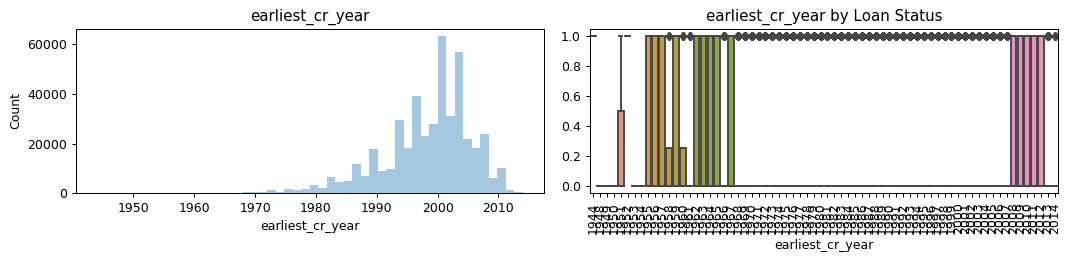

In [229]:
plot_feature('earliest_cr_year', True)

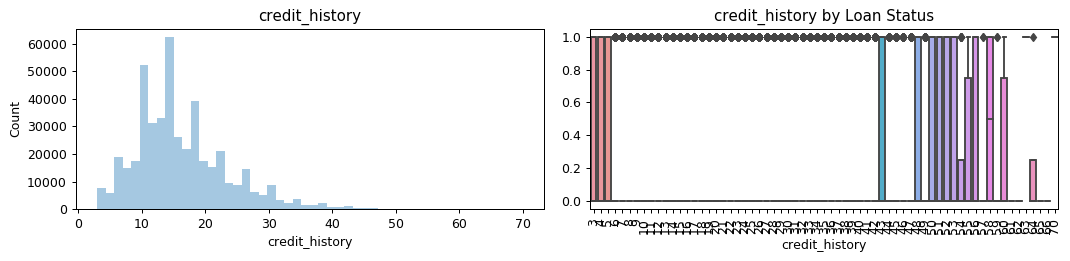

In [230]:
plot_feature('credit_history', True)

In [231]:
df_selected.drop('earliest_cr_year', axis = 1, inplace=True)

In [236]:
find_high_correlated_features(df_selected)

int_rate              term              0.435879
installment           loan_amnt         0.952673
grade                 term              0.446887
                      int_rate          0.962951
sub_grade             term              0.454138
                      int_rate          0.985559
                      grade             0.976940
revol_util            fico_range_low   -0.429507
total_acc             open_acc          0.689583
acc_open_past_24mths  open_acc          0.482634
                      total_acc         0.428877
mort_acc              home_ownership   -0.477745
pub_rec_bankruptcies  pub_rec           0.642983
tax_liens             pub_rec           0.695931
dtype: float64


### Observe the selected features

In [237]:
df_selected.shape

(457484, 31)

In [238]:
df_selected.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,credit_history
16,3600.0,36,7.49,111.97,0,3,10,1,120000.0,1,0,9,15,18.90,0.0,720.0,18.0,1.0,5658.0,14.900000,33.0,1,0,13.0,0.0,1.0,0.0,0,7,2017,25
38,35000.0,60,25.49,1037.38,4,23,10,1,114000.0,0,0,4,45,14.04,0.0,660.0,17.0,0.0,35694.0,74.800003,31.0,1,0,2.0,4.0,0.0,0.0,0,7,2017,19
40,17000.0,36,7.49,528.73,0,3,10,1,120000.0,1,0,2,44,8.41,0.0,735.0,9.0,1.0,15406.0,31.600000,34.0,1,0,3.0,2.0,1.0,0.0,0,7,2017,12
51,10000.0,36,11.49,329.72,1,9,10,3,145000.0,1,0,2,31,13.31,2.0,705.0,13.0,0.0,7936.0,31.900000,30.0,1,0,8.0,1.0,0.0,0.0,0,7,2017,12
56,5000.0,36,14.99,173.31,2,13,10,4,68000.0,1,0,2,4,22.50,0.0,660.0,6.0,0.0,10276.0,90.099998,18.0,0,0,2.0,0.0,0.0,0.0,0,7,2017,14


In [ ]:
### Make Model

In [239]:
from sklearn.utils import shuffle, class_weight
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Class balance

In [260]:
df_selected.loan_status.value_counts(normalize=True)

0    0.783494
1    0.216506
Name: loan_status, dtype: float64

Loan status class is imbalanced. We need to treat this with some special techniques: 

(1) Assign class weight
(2) Use ensemble algorithoms with cross validation
(3) Overpredict minor class

#### 0. Evaluation metrics:

In [258]:
def evaluate_model(ytest, ypred):
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

#### 1. Standarize the data 

In [240]:
X = df_selected.drop('loan_status', axis = 1)
Y = df_selected.loan_status
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

In [251]:
mms = StandardScaler()
mms.fit(xtrain)
xtrain_scaled = mms.transform(xtrain)

#### 2. Linear logistic regression model

In [245]:
logisticRegr = LogisticRegression()

In [252]:
logisticRegr.fit(xtrain_scaled, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [253]:
xtest_scaled = mms.transform(xtest)

In [254]:
predictions = logisticRegr.predict(xtest_scaled)

In [259]:
evaluate_model(ytest, predictions)

Accuracy of the model: 0.7906637172010387

Classification report: 
             precision    recall  f1-score   support

          0       0.80      0.97      0.88     89757
          1       0.55      0.14      0.22     24614

avg / total       0.75      0.79      0.74    114371


Confusion matrix: 
[[86956  2801]
 [21141  3473]]

